# Coding the forward propagation algorithm

In this exercise, you'll write code to do forward propagation (prediction) for your first neural network:

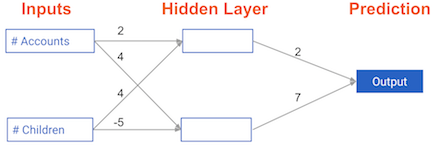

Each data point is a customer. The first input is how many accounts they have, and the second input is how many children they have. The model will predict how many transactions the user makes in the next year. You will use this data throughout the first 2 chapters of this course.

The input data has been pre-loaded as input_data, and the weights are available in a dictionary called weights. The array of weights for the first node in the hidden layer are in weights['node_0'], and the array of weights for the second node in the hidden layer are in weights['node_1'].

The weights feeding into the output node are available in weights['output'].

NumPy will be pre-imported for you as np in all exercises.


In [6]:
import numpy as np

weights = {'node_0': np.array([2, 4]), 
           'node_1': np.array([ 4, -5]), 
           'output': np.array([2, 7])}

input_data = np.array([3, 5])

# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)


-39


## The Rectified Linear Activation Function
As Dan explained to you in the video, an "activation function" is a function applied at each node. It converts the node's input into some output.

The rectified linear activation function (called ReLU) has been shown to lead to very high-performance networks. This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.

Here are some examples:
relu(3) = 3
relu(-3) = 0

In [4]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(input,0)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


## Applying the network to many observations/rows of data

You'll now define a function called predict_with_network() which will generate predictions for multiple data observations, which are pre-loaded as input_data. As before, weights are also pre-loaded. In addition, the relu() function you defined in the previous exercise has been pre-loaded.

In [5]:
input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer =  (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row,weights))

# Print results
print(results)
        

[52, 63, 0, 148]


## Forward propagation in a deeper network
You now have a model with 2 hidden layers. The values for an input data point are shown inside the input nodes. The weights are shown on the edges/lines. What prediction would this model make on this data point?

Assume the activation function at each node is the identity function. That is, each node's output will be the same as its input. So the value of the bottom node in the first hidden layer is -1, and not 0, as it would be if the ReLU activation function was used.

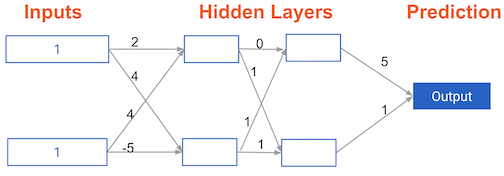

The answer is 0

## Multi-layer neural networks
In this exercise, you'll write code to do forward propagation for a neural network with 2 hidden layers. Each hidden layer has two nodes. The input data has been preloaded as input_data. The nodes in the first hidden layer are called node_0_0 and node_0_1. Their weights are pre-loaded as weights['node_0_0'] and weights['node_0_1'] respectively.

The nodes in the second hidden layer are called node_1_0 and node_1_1. Their weights are pre-loaded as weights['node_1_0'] and weights['node_1_1'] respectively.

We then create a model output from the hidden nodes using weights pre-loaded as weights['output'].
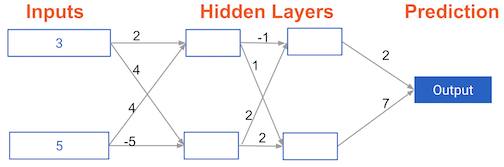


In [7]:
weights = {'node_0_0': np.array([2, 4]),
           'node_0_1': np.array([ 4, -5]),
           'node_1_0': np.array([-1,  2]),
           'node_1_1': np.array([1, 2]),
           'output': np.array([2, 7])}

input_data =  np.array([3, 5])

def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input =  (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input =  (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = ( hidden_1_outputs *weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)


182


## Representations are learned
How are the weights that determine the features/interactions in Neural Networks created?
- The model training process sets them to optimize predictive accuracy.

## Levels of representation
Which layers of a model capture more complex or "higher level" interactions?
- The last layers capture the most complex interactions.

## Calculating model errors
For the exercises in this chapter, you'll continue working with the network to predict transactions for a bank.

What is the error (predicted - actual) for the following network using the ReLU activation function when the input data is [3, 2] and the actual value of the target (what you are trying to predict) is 5? It may be helpful to get out a pen and piece of paper to calculate these values.
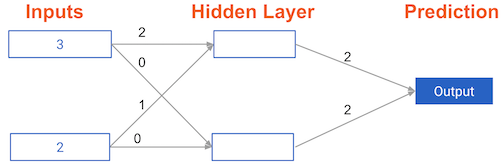

- The network generates a prediction of 16, which results in an error of 11.
- Increasing the weight to 2.01 would increase the resulting error from 9 to 9.08, making the predictions less accurate.

Coding how weight changes affect accuracy
Now you'll get to change weights in a real network and see how they affect model accuracy!

Have a look at the following neural network:

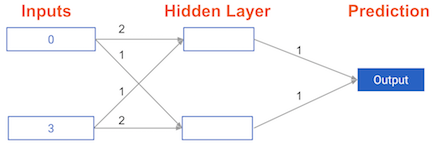
Its weights have been pre-loaded as weights_0. Your task in this exercise is to update a single weight in weights_0 to create weights_1, which gives a perfect prediction (in which the predicted value is equal to target_actual: 3).

Use a pen and paper if necessary to experiment with different combinations. You'll use the predict_with_network() function, which takes an array of data as the first argument, and weights as the second argument.

In [9]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = node_0_input

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = node_1_input

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer =  (hidden_layer_outputs * weights['output']).sum()
    model_output = input_to_final_layer
    
    # Return model output
    return(model_output)
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 0],
             'output': [1, 1]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)


6
0


## Scaling up to multiple data points
You've seen how different weights will have different accuracies on a single prediction. But usually, you'll want to measure model accuracy on many points. You'll now write code to compare model accuracies for two different sets of weights, which have been stored as weights_0 and weights_1.

input_data is a list of arrays. Each item in that list contains the data to make a single prediction. target_actuals is a list of numbers. Each item in that list is the actual value we are trying to predict.

In this exercise, you'll use the mean_squared_error() function from sklearn.metrics. It takes the true values and the predicted values as arguments.

You'll also use the preloaded predict_with_network() function, which takes an array of data as the first argument, and weights as the second argument.

In [13]:
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
target_actuals = [1, 3, 5, 7]
weights_0 = {'node_0': np.array([2, 1]),
             'node_1': np.array([1, 2]), 
             'output': np.array([1, 1])}

weights_1 = {'node_0': np.array([2, 1]),
             'node_1': np.array([1. , 1.5]),
             'output': np.array([1. , 1.5])}

from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)


Mean squared error with weights_0: 80.250000
Mean squared error with weights_1: 99.890625


## Calculating slopes
You're now going to practice calculating slopes. When plotting the mean-squared error loss function against predictions, the slope is 2 * x * (xb-y), or 2 * input_data * error. Note that x and b may have multiple numbers (x is a vector for each data point, and b is a vector). In this case, the output will also be a vector, which is exactly what you want.

You're ready to write the code to calculate this slope while using a single data point. You'll use pre-defined weights called weights as well as data for a single point called input_data. The actual value of the target you want to predict is stored in target.

In [15]:
input_data = np.array([1, 2, 3])
weights =  np.array([0, 2, 1])
target = [0]
# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = input_data * error * 2

# Print the slope
print(slope)


[14 28 42]


## Improving model weights
Hurray! You've just calculated the slopes you need. Now it's time to use those slopes to improve your model. If you add the slopes to your weights, you will move in the right direction. However, it's possible to move too far in that direction. So you will want to take a small step in that direction first, using a lower learning rate, and verify that the model is improving.

The weights have been pre-loaded as weights, the actual value of the target as target, and the input data as input_data. The predictions from the initial weights are stored as preds.

In [16]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - (learning_rate * slope) 

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)


[7]
[5.04]


## Making multiple updates to weights
You're now going to make multiple updates so you can dramatically improve your model weights, and see how the predictions improve with each update.

To keep your code clean, there is a pre-loaded get_slope() function that takes input_data, target, and weights as arguments. There is also a get_mse() function that takes the same arguments. The input_data, target, and weights have been pre-loaded.

This network does not have any hidden layers, and it goes directly from the input (with 3 nodes) to an output node. Note that weights is a single array.

We have also pre-loaded matplotlib.pyplot, and the error history will be plotted after you have done your gradient descent steps.

- Exercise functions 

In [22]:
def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return(error)


# get slope function
def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)   
    slope = 2 * input_data * error
    return(slope)

def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors**2)
    return(mse)


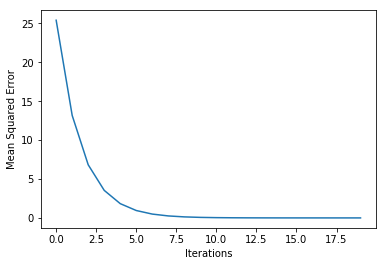

In [23]:
from matplotlib import pyplot as plt
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

## Thinking about backward propagation
If your predictions were all exactly right, and your errors were all exactly 0, the slope of the loss function with respect to your predictions would also be 0. In that circumstance, which of the following statements would be correct?

- the updates to all weights in the network would indeed also be 0


## A round of backpropagation
In the network shown below, we have done forward propagation, and node values calculated as part of forward propagation are shown in white. The weights are shown in black. Layers after the question mark show the slopes calculated as part of back-prop, rather than the forward-prop values. Those slope values are shown in purple.

This network again uses the ReLU activation function, so the slope of the activation function is 1 for any node receiving a positive value as input. Assume the node being examined had a positive value (so the activation function's slope is 1).

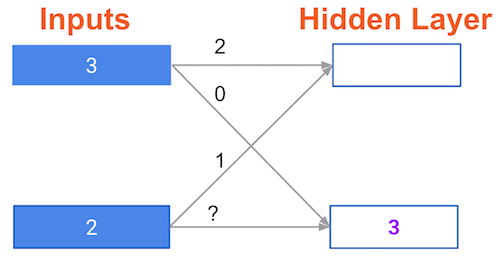

What is the slope needed to update the weight with the question mark?

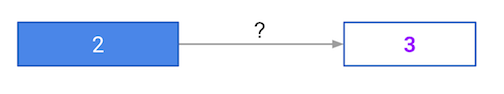

- The slope needed to update this weight is indeed 6

## Understanding your data
You will soon start building models in Keras to predict wages based on various professional and demographic factors. Before you start building a model, it's good to understand your data by performing some exploratory analysis.

The data is pre-loaded into a pandas DataFrame called df. Use the .head() and .describe() methods in the IPython Shell for a quick overview of the DataFrame.

The target variable you'll be predicting is wage_per_hour. Some of the predictor variables are binary indicators, where a value of 1 represents True, and 0 represents False.

Of the 9 predictor variables in the DataFrame, how many are binary indicators? The min and max values as shown by .describe() will be informative here. How many binary indicator predictors are there?
- 6

In [4]:
import pandas as pd

df = pd.read_csv("hourly_wages.csv")

df.head()



,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [5]:
df.describe()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,9.024064,0.179775,13.018727,17.822097,36.833333,0.458801,0.655431,0.292135,0.185393,0.044944
std,5.139097,0.384360,2.615373,12.379710,11.726573,0.498767,0.475673,0.455170,0.388981,0.207375
min,1.000000,0.000000,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,0.000000,12.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.780000,0.000000,12.000000,15.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.250000,0.000000,15.000000,26.000000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,44.500000,1.000000,18.000000,55.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Specifying a model
Now you'll get to work with your first model in Keras, and will immediately be able to run more complex neural network models on larger datasets compared to the first two chapters.

To start, you'll take the skeleton of a neural network and add a hidden layer and an output layer. You'll then fit that model and see Keras do the optimization so your model continually gets better.

As a start, you'll predict workers wages based on characteristics like their industry, education and level of experience. You can find the dataset in a pandas dataframe called df. For convenience, everything in df except for the target has been converted to a NumPy matrix called predictors. The target, wage_per_hour, is available as a NumPy matrix called target.

For all exercises in this chapter, we've imported the Sequential model constructor, the Dense layer constructor, and pandas.

In [19]:
target = df['wage_per_hour'].values

predictors  = df.drop('wage_per_hour', axis = 1).values

# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation = "relu", input_shape =(n_cols, )))

# Add the second layer
model.add(Dense(32, activation= "relu"))

# Add the output layer
model.add(Dense(1))


## Compiling the model
You're now going to compile the model you specified earlier. To compile the model, you need to specify the optimizer and loss function to use. In the video, Dan mentioned that the Adam optimizer is an excellent choice. You can read more about it as well as other keras optimizers here, and if you are really curious to learn more, you can read the original paper that introduced the Adam optimizer.

In this exercise, you'll use the Adam optimizer and the mean squared error loss function. Go for it!

In [20]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


## Fitting the model
You're at the most fun part. You'll now fit the model. Recall that the data to be used as predictive features is loaded in a NumPy matrix called predictors and the data to be predicted is stored in a NumPy matrix called target. Your model is pre-written and it has been compiled with the code from the previous exercise.

In [22]:
model.fit(predictors, target, epochs = 10)

Epoch 1/10
534/534 [==============================] - 0s 50us/step - loss: 33.0082
Epoch 2/10
534/534 [==============================] - 0s 39us/step - loss: 26.2000
Epoch 3/10
534/534 [==============================] - 0s 43us/step - loss: 24.1919
Epoch 4/10
534/534 [==============================] - 0s 37us/step - loss: 23.1762
Epoch 5/10
534/534 [==============================] - 0s 32us/step - loss: 22.8131
Epoch 6/10
534/534 [==============================] - 0s 41us/step - loss: 22.1156
Epoch 7/10
534/534 [==============================] - 0s 43us/step - loss: 21.9082
Epoch 8/10
534/534 [==============================] - 0s 32us/step - loss: 21.8637
Epoch 9/10
534/534 [==============================] - 0s 41us/step - loss: 21.5395
Epoch 10/10
534/534 [==============================] - 0s 41us/step - loss: 21.7754


## Understanding your classification data
Now you will start modeling with a new dataset for a classification problem. This data includes information about passengers on the Titanic. You will use predictors such as age, fare and where each passenger embarked from to predict who will survive. This data is from a tutorial on data science competitions. Look here for descriptions of the features.

The data is pre-loaded in a pandas DataFrame called df.

It's smart to review the maximum and minimum values of each variable to ensure the data isn't misformatted or corrupted. What was the maximum age of passengers on the Titanic? Use the .describe() method in the IPython Shell to answer this question.

In [39]:
titanic = pd.read_csv("titanic_all_numeric.csv")

titanic.describe()

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


## Last steps in classification models
You'll now create a classification model using the titanic dataset, which has been pre-loaded into a DataFrame called df. You'll take information about the passengers and predict which ones survived.

The predictive variables are stored in a NumPy array predictors. The target to predict is in df.survived, though you'll have to manipulate it for keras. The number of predictive features is stored in n_cols.

Here, you'll use the 'sgd' optimizer, which stands for Stochastic Gradient Descent. You'll learn more about this in the next chapter!

In [65]:
# Import necessary modules

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
# Convert the target to categorical: target
titanic_target = titanic.survived.values


predictors_titanic = titanic.drop('survived', axis = 1).values

X_train, X_test, y_train, y_test = train_test_split(predictors_titanic, titanic_target, test_size=0.20, random_state=42)

n_cols_tita = X_train.shape[1]

titanic_train_target = to_categorical(y_train)

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation="relu", input_shape = (n_cols_tita, )))

# Add the output layer
model.add(Dense(2, activation="softmax"))

# Compile the model
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model

model.fit(X_train, titanic_train_target, epochs =10)



Epoch 1/10
712/712 [==============================] - 0s 179us/step - loss: 3.4747 - accuracy: 0.5730
Epoch 2/10
712/712 [==============================] - 0s 38us/step - loss: 1.0107 - accuracy: 0.6180
Epoch 3/10
712/712 [==============================] - 0s 48us/step - loss: 0.6336 - accuracy: 0.6994
Epoch 4/10
712/712 [==============================] - 0s 43us/step - loss: 0.6382 - accuracy: 0.6531
Epoch 5/10
712/712 [==============================] - 0s 43us/step - loss: 0.6030 - accuracy: 0.6840
Epoch 6/10
712/712 [==============================] - 0s 32us/step - loss: 0.6132 - accuracy: 0.6770
Epoch 7/10
712/712 [==============================] - 0s 32us/step - loss: 0.6026 - accuracy: 0.6924
Epoch 8/10
712/712 [==============================] - 0s 36us/step - loss: 0.5848 - accuracy: 0.7008
Epoch 9/10
712/712 [==============================] - 0s 28us/step - loss: 0.5762 - accuracy: 0.7177
Epoch 10/10
712/712 [==============================] - 0s 36us/step - loss: 0.5721 - accur

## Making predictions
The trained network from your previous coding exercise is now stored as model. New data to make predictions is stored in a NumPy array as pred_data. Use model to make predictions on your new data.

In this exercise, your predictions will be probabilities, which is the most common way for data scientists to communicate their predictions to colleagues.

In [66]:
# Calculate predictions: predictions
predictions = model.predict(X_test)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true)

[0.4393523  0.48866495 0.39731222 0.61088556 0.45835057 0.74529445
 0.55348486 0.4456181  0.4904442  0.6187477  0.716584   0.37187845
 0.63650054 0.37413827 0.541665   0.61706865 0.78558517 0.5543863
 0.51765    0.8420926  0.4106096  0.6868524  0.50741607 0.41173482
 0.520634   0.4718528  0.6947375  0.5317584  0.4826215  0.5232366
 0.39360932 0.529245   0.6563818  0.5493375  0.39192986 0.44160265
 0.68162596 0.55348486 0.7492457  0.43249092 0.6784965  0.36272633
 0.43647745 0.4258504  0.60461956 0.5229629  0.39649883 0.42204925
 0.39490002 0.8264776  0.53941685 0.812945   0.5041746  0.81333935
 0.32684872 0.73319507 0.48613372 0.97091943 0.7334454  0.5025388
 0.39904588 0.57022554 0.707388   0.6702328  0.4258504  0.5491688
 0.7179668  0.40357038 0.31448063 0.8217575  0.6639794  0.9792342
 0.61968404 0.75069606 0.4067286  0.527727   0.5332341  0.6472109
 0.6576547  0.650716   0.4980961  0.61798155 0.8576531  0.42570966
 0.7872377  0.8979904  0.8258033  0.7168161  0.2451397  0.41589525
 

## Diagnosing optimization problems
Which of the following could prevent a model from showing an improved loss in its first few epochs?
* Learning rate too low.

* Learning rate too high.

* Poor choice of activation function.
* All of the above.

- **All of the above.**




## Changing optimization parameters
It's time to get your hands dirty with optimization. You'll now try optimizing a model at a very low learning rate, a very high learning rate, and a "just right" learning rate. You'll want to look at the results after running this exercise, remembering that a low value for the loss function is good.

For these exercises, we've pre-loaded the predictors and target values from your previous classification models (predicting who would survive on the Titanic). You'll want the optimization to start from scratch every time you change the learning rate, to give a fair comparison of how each learning rate did in your results. So we have created a function get_new_model() that creates an unoptimized model to optimize.

In [77]:
input_shape = (n_cols_tita,)
def get_new_model(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape = input_shape))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr = lr)
    
    # Compile the model
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy')   
    
    # Fit the model
    model.fit(X_train, titanic_train_target, epochs =10)

    



Testing model with learning rate: 0.000001

Epoch 1/10
712/712 [==============================] - 0s 301us/step - loss: 1.8486
Epoch 2/10
712/712 [==============================] - 0s 38us/step - loss: 1.8446
Epoch 3/10
712/712 [==============================] - 0s 38us/step - loss: 1.8405
Epoch 4/10
712/712 [==============================] - 0s 36us/step - loss: 1.8365
Epoch 5/10
712/712 [==============================] - 0s 38us/step - loss: 1.8325
Epoch 6/10
712/712 [==============================] - 0s 38us/step - loss: 1.8284
Epoch 7/10
712/712 [==============================] - 0s 36us/step - loss: 1.8243
Epoch 8/10
712/712 [==============================] - 0s 31us/step - loss: 1.8202
Epoch 9/10
712/712 [==============================] - 0s 46us/step - loss: 1.8161
Epoch 10/10
712/712 [==============================] - 0s 43us/step - loss: 1.8121


Testing model with learning rate: 0.010000

Epoch 1/10
712/712 [==============================] - 0s 296us/step - loss: 0.9847
Epo

## Evaluating model accuracy on validation dataset
Now it's your turn to monitor model accuracy with a validation data set. A model definition has been provided as model. Your job is to add the code to compile it and then fit it. You'll check the validation score in each epoch.

In [81]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols_tita,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])


# Fit the model
hist = model.fit(X_train, titanic_train_target,validation_split = 0.3, epochs = 10)



Train on 498 samples, validate on 214 samples
Epoch 1/10
498/498 [==============================] - 0s 830us/step - loss: 0.8264 - accuracy: 0.6265 - val_loss: 0.9846 - val_accuracy: 0.6449
Epoch 2/10
498/498 [==============================] - 0s 114us/step - loss: 0.8584 - accuracy: 0.6165 - val_loss: 1.0564 - val_accuracy: 0.6495
Epoch 3/10
498/498 [==============================] - 0s 90us/step - loss: 0.7803 - accuracy: 0.6928 - val_loss: 0.7301 - val_accuracy: 0.6729
Epoch 4/10
498/498 [==============================] - 0s 79us/step - loss: 0.6068 - accuracy: 0.6968 - val_loss: 0.5833 - val_accuracy: 0.7243
Epoch 5/10
498/498 [==============================] - 0s 80us/step - loss: 0.6750 - accuracy: 0.6747 - val_loss: 0.5960 - val_accuracy: 0.6449
Epoch 6/10
498/498 [==============================] - 0s 102us/step - loss: 0.5876 - accuracy: 0.6847 - val_loss: 0.7054 - val_accuracy: 0.6869
Epoch 7/10
498/498 [==============================] - 0s 72us/step - loss: 0.6315 - accuracy:

## Early stopping: Optimizing the optimization
Now that you know how to monitor your model performance throughout optimization, you can use early stopping to stop optimization when it isn't helping any more. Since the optimization stops automatically when it isn't helping, you can also set a high value for epochs in your call to .fit(), as Dan showed in the video.

The model you'll optimize has been specified as model. As before, the data is pre-loaded as predictors and target.

In [83]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols_tita,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(X_train, titanic_train_target, validation_split=0.3, epochs = 30,callbacks = [early_stopping_monitor])



Train on 498 samples, validate on 214 samples
Epoch 1/30
498/498 [==============================] - 0s 857us/step - loss: 0.9300 - accuracy: 0.6165 - val_loss: 0.8886 - val_accuracy: 0.6495
Epoch 2/30
498/498 [==============================] - 0s 80us/step - loss: 0.8286 - accuracy: 0.6566 - val_loss: 0.8388 - val_accuracy: 0.5888
Epoch 3/30
498/498 [==============================] - 0s 78us/step - loss: 0.7250 - accuracy: 0.6426 - val_loss: 0.6632 - val_accuracy: 0.7056
Epoch 4/30
498/498 [==============================] - 0s 102us/step - loss: 0.6263 - accuracy: 0.6767 - val_loss: 0.6021 - val_accuracy: 0.6916
Epoch 5/30
498/498 [==============================] - 0s 90us/step - loss: 0.6294 - accuracy: 0.6847 - val_loss: 0.6558 - val_accuracy: 0.6869
Epoch 6/30
498/498 [==============================] - 0s 86us/step - loss: 0.6445 - accuracy: 0.7269 - val_loss: 0.5836 - val_accuracy: 0.7383
Epoch 7/30
498/498 [==============================] - 0s 78us/step - loss: 0.6068 - accuracy: 

## Experimenting with wider networks
Now you know everything you need to begin experimenting with different models!

A model called model_1 has been pre-loaded. You can see a summary of this model printed in the IPython Shell. This is a relatively small network, with only 10 units in each hidden layer.

In this exercise you'll create a new model called model_2 which is similar to model_1, except it has 100 units in each hidden layer.

After you create model_2, both models will be fitted, and a graph showing both models loss score at each epoch will be shown. We added the argument verbose=False in the fitting commands to print out fewer updates, since you will look at these graphically instead of as text.

Because you are fitting two models, it will take a moment to see the outputs after you hit run, so be patient.

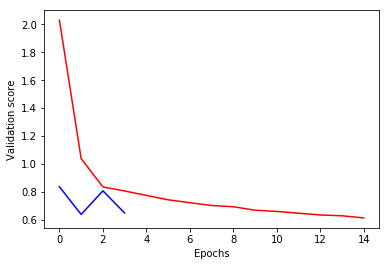

In [85]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

## model 1
# Create the new model: model_2
model_1 = Sequential()

# Add the first and second layers
model_1.add(Dense(10, activation = "relu", input_shape=input_shape))
model_1.add(Dense(10, activation = "relu"))

# Add the output layer
model_1.add(Dense(2, activation = "softmax"))


# Compile model_2
model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation = "relu", input_shape=input_shape))
model_2.add(Dense(100, activation = "relu"))

# Add the output layer
model_2.add(Dense(2, activation = "softmax"))


# Compile model_2
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(X_train, titanic_train_target,
                               epochs=15, validation_split=0.2, 
                               callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(X_train, titanic_train_target,
                               epochs=15, validation_split=0.2,
                               callbacks=[early_stopping_monitor], verbose=False)

import matplotlib.pyplot as plt
# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


## Adding layers to a network
You've seen how to experiment with wider networks. In this exercise, you'll try a deeper network (more hidden layers).

Once again, you have a baseline model called model_1 as a starting point. It has 1 hidden layer, with 50 units. You can see a summary of that model's structure printed out. You will create a similar network with 3 hidden layers (still keeping 50 units in each layer).

This will again take a moment to fit both models, so you'll need to wait a few seconds to see the results after you run your code.

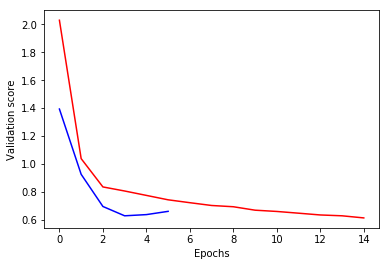

In [87]:
# The input shape to use in the first hidden layer
input_shape = (n_cols_tita,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation = "relu", input_shape=input_shape))
model_2.add(Dense(50, activation = "relu"))
model_2.add(Dense(50, activation = "relu"))


# Add the output layer
model_2.add(Dense(2, activation = "softmax"))


# Compile model_2
model_2.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy', 
                metrics=['accuracy'])



# Fit model 2
model_2_training = model_2.fit(X_train, titanic_train_target,
                               epochs=20, validation_split=0.4,
                               callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


- The blue model is the one you made and the red is the original model. The model with the lower loss value is the better model.

## Experimenting with model structures
You've just run an experiment where you compared two networks that were identical except that the 2nd network had an extra hidden layer. You see that this 2nd network (the deeper network) had better performance. Given that, which of the following would be a good experiment to run next for even better performance?

- Increasing the number of units in each hidden layer would be a good next step to try achieving even better performance.

## Building your own digit recognition model
You've reached the final exercise of the course - you now know everything you need to build an accurate model to recognize handwritten digits!

We've already done the basic manipulation of the MNIST dataset shown in the video, so you have X and y loaded and ready to model with. Sequential and Dense from keras are also pre-imported.

To add an extra challenge, we've loaded only 2500 images, rather than 60000 which you will see in some published results. Deep learning models perform better with more data, however, they also take longer to train, especially when they start becoming more complex.

If you have a computer with a CUDA compatible GPU, you can take advantage of it to improve computation time. If you don't have a GPU, no problem! You can set up a deep learning environment in the cloud that can run your models on a GPU. Here is a blog post by Dan that explains how to do this - check it out after completing this exercise! It is a great next step as you continue your deep learning journey.

Ready to take your deep learning to the next level? Check out Advanced Deep Learning with Keras in Python to see how the Keras functional API lets you build domain knowledge to solve new types of problems. Once you know how to use the functional API, take a look at "Convolutional Neural Networks for Image Processing" to learn image-specific applications of Keras.

In [92]:
mnist = pd.read_csv("mnist.csv")
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# Convert the target to categorical: target
mnist_target = mnist.label.values


mnist_predictors = mnist.drop('label', axis = 1).values

X_train, X_test, y_train, y_test = train_test_split(mnist_predictors, mnist_target,
                                                    test_size=0.20, random_state=42)

n_cols_mnist = X_train.shape[1]

mnist_train_target = to_categorical(y_train)


In [98]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(784, activation= "relu", input_shape = (784,)))

# Add the second hidden layer
model.add(Dense(784, activation= "relu"))

# Add the output layer
model.add(Dense(10, activation= "softmax"))


# Compile the model
model.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy', 
                metrics=['accuracy'])

early_stopping_monitor = EarlyStopping(patience=5)

# Fit the model
hist = model.fit(X_train, mnist_train_target,
          epochs=20, validation_split=0.3,
         callbacks=[early_stopping_monitor])
                               


Train on 23520 samples, validate on 10080 samples
Epoch 1/20
23520/23520 [==============================] - 13s 537us/step - loss: 3.0947 - accuracy: 0.8814 - val_loss: 0.4898 - val_accuracy: 0.9318
Epoch 2/20
23520/23520 [==============================] - 14s 574us/step - loss: 0.3139 - accuracy: 0.9447 - val_loss: 0.3341 - val_accuracy: 0.9422
Epoch 3/20
23520/23520 [==============================] - 12s 518us/step - loss: 0.2072 - accuracy: 0.9548 - val_loss: 0.2999 - val_accuracy: 0.9432
Epoch 4/20
23520/23520 [==============================] - 12s 515us/step - loss: 0.1948 - accuracy: 0.9574 - val_loss: 0.3780 - val_accuracy: 0.9422
Epoch 5/20
23520/23520 [==============================] - 13s 546us/step - loss: 0.2242 - accuracy: 0.9537 - val_loss: 0.2870 - val_accuracy: 0.9459
Epoch 6/20
23520/23520 [==============================] - 12s 526us/step - loss: 0.1955 - accuracy: 0.9591 - val_loss: 0.4099 - val_accuracy: 0.9320
Epoch 7/20
23520/23520 [==============================] 